# Analysing Results

In [1]:
import gzip
import json

from pprint import pprint

import lcdb.json
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from deephyper.analysis import rank
from deephyper.analysis._matplotlib import figure_size, update_matplotlib_rc
from lcdb.analysis import read_csv_results


update_matplotlib_rc()
figsize = figure_size(252 * 1.8, 1.0)

In [2]:
# Load a dataframe with the results
# The dataframe is sorted by `job_id` (increasing) as parallel jobs scheduled asynchronously 
# may be collected in a different order than when they were submitted.
with gzip.GzipFile("results.csv.gz", "rb") as f:        
    r_df, r_df_failed = read_csv_results(f)
r_df

,p:activation,p:activity_regularizer,p:batch_norm,p:batch_size,p:bias_regularizer,p:dropout_rate,p:kernel_initializer,p:kernel_regularizer,p:learning_rate,p:num_layers,...,m:openmlid,m:workflow_seed,m:workflow,m:valid_prop,m:test_prop,m:monotonic,m:valid_seed,m:test_seed,m:traceback,m:json
4,relu,none,False,32,none,0.100000,glorot_uniform,none,0.001000,5,...,61,27,lcdb.workflow.keras.DenseNNWorkflow,0.1,0.1,True,42,42,NaN,"{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
22,none,L2,True,103,L2,0.406849,glorot_normal,L2,0.189259,15,...,61,27,lcdb.workflow.keras.DenseNNWorkflow,0.1,0.1,True,42,42,NaN,"{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
19,selu,L2,True,1,none,0.429665,glorot_uniform,none,4.678007,14,...,61,27,lcdb.workflow.keras.DenseNNWorkflow,0.1,0.1,True,42,42,NaN,"{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
9,elu,L1,True,35,none,0.150948,orthogonal,none,0.000031,20,...,61,27,lcdb.workflow.keras.DenseNNWorkflow,0.1,0.1,True,42,42,NaN,"{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
2,sigmoid,L1,False,3,L1,0.378493,zeros,L1,0.050642,1,...,61,27,lcdb.workflow.keras.DenseNNWorkflow,0.1,0.1,True,42,42,NaN,"{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,elu,L1,True,10,L2,0.809050,variance_scaling,none,6.785481,11,...,61,27,lcdb.workflow.keras.DenseNNWorkflow,0.1,0.1,True,42,42,NaN,"{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
446,tanh,L2,False,243,L1L2,0.671782,glorot_normal,L2,0.012241,8,...,61,27,lcdb.workflow.keras.DenseNNWorkflow,0.1,0.1,True,42,42,NaN,"{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
442,softsign,L1,True,27,L1,0.011865,zeros,L1,0.000738,1,...,61,27,lcdb.workflow.keras.DenseNNWorkflow,0.1,0.1,True,42,42,NaN,"{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
447,sigmoid,none,True,344,L1,0.258737,orthogonal,L1L2,0.024669,3,...,61,27,lcdb.workflow.keras.DenseNNWorkflow,0.1,0.1,True,42,42,NaN,"{'tag': 'run', 'timestamp_start': 0.0, 'timest..."


In [3]:
r_df_failed

,p:activation,p:activity_regularizer,p:batch_norm,p:batch_size,p:bias_regularizer,p:dropout_rate,p:kernel_initializer,p:kernel_regularizer,p:learning_rate,p:num_layers,...,m:openmlid,m:workflow_seed,m:workflow,m:valid_prop,m:test_prop,m:monotonic,m:valid_seed,m:test_seed,m:traceback,m:json
6,none,L1,False,83,L1,0.627696,glorot_uniform,L1L2,3.457627,20,...,61,27,lcdb.workflow.keras.DenseNNWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
12,none,L1L2,False,3,L1,0.658099,glorot_normal,L1,1.137481,7,...,61,27,lcdb.workflow.keras.DenseNNWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
15,exponential,L2,False,1,none,0.387183,he_uniform,L2,0.173661,2,...,61,27,lcdb.workflow.keras.DenseNNWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
16,exponential,L1,True,140,L1,0.530861,glorot_normal,L1L2,2.780485,18,...,61,27,lcdb.workflow.keras.DenseNNWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
21,exponential,L1L2,False,5,none,0.446946,glorot_normal,L2,0.001595,20,...,61,27,lcdb.workflow.keras.DenseNNWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
31,exponential,L2,False,1,L1,0.299504,glorot_normal,L1L2,0.192845,8,...,61,27,lcdb.workflow.keras.DenseNNWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
37,exponential,L1L2,False,7,none,0.769173,random_normal,L1,0.315303,4,...,61,27,lcdb.workflow.keras.DenseNNWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
47,exponential,L2,True,418,none,0.712312,orthogonal,L1,0.000035,14,...,61,27,lcdb.workflow.keras.DenseNNWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
55,exponential,L1L2,True,2,none,0.048651,orthogonal,L1,1.774394,15,...,61,27,lcdb.workflow.keras.DenseNNWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."
58,softplus,L2,True,8,L1,0.781015,variance_scaling,none,3.279588,9,...,61,27,lcdb.workflow.keras.DenseNNWorkflow,0.1,0.1,True,42,42,"""Traceback (most recent call last):\n File ""/...","{'tag': 'run', 'timestamp_start': 0.0, 'timest..."


In [4]:
# Display the error of a failed job
idx = 0
print(r_df_failed.iloc[idx]["m:traceback"])

"Traceback (most recent call last):
  File "/lus/grand/projects/datascience/regele/polaris/lcdb/publications/2023-neurips/lcdb/controller.py", line 208, in fit_workflow_on_current_anchor
    self.workflow.fit(
  File "/lus/grand/projects/datascience/regele/polaris/lcdb/publications/2023-neurips/lcdb/utils.py", line 67, in terminate_on_timeout
    return results.get(timeout)
  File "/lus/grand/projects/datascience/regele/polaris/lcdb/publications/2023-neurips/build/dhenv/lib/python3.10/multiprocessing/pool.py", line 774, in get
    raise self._value
  File "/lus/grand/projects/datascience/regele/polaris/lcdb/publications/2023-neurips/build/dhenv/lib/python3.10/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/lus/grand/projects/datascience/regele/polaris/lcdb/publications/2023-neurips/lcdb/workflow/_base_workflow.py", line 31, in fit
    self._fit(X=X, y=y, metadata=metadata, *args, **kwargs)
  File "/lus/grand/projects/datascience/regele/po

In [ ]:


query = QueryAnchorValues()
print(query.apply(data))

query = QueryMetricValues("confusion_matrix")
print(query.apply(data))

In [12]:
?map

Init signature: map(self, /, *args, **kwargs)
Docstring:     
map(func, *iterables) --> map object

Make an iterator that computes the function using arguments from
each of the iterables.  Stops when the shortest iterable is exhausted.
Type:           type
Subclasses:     

In [19]:
from lcdb.analysis.json import QueryAnchorValues, QueryMetricValues
from lcdb.analysis.score import accuracy_from_confusion_matrix



source = r_df["m:json"]

query_anchor_values = QueryAnchorValues()
anchor_values = source.apply(lambda x: query_anchor_values(x)).to_list()

query_confusion_matrix_values = QueryMetricValues("confusion_matrix")
out = source.apply(lambda x: query_confusion_matrix_values(x))
accuracy_values = out.apply(lambda x: list(map(accuracy_from_confusion_matrix, x))).to_list()

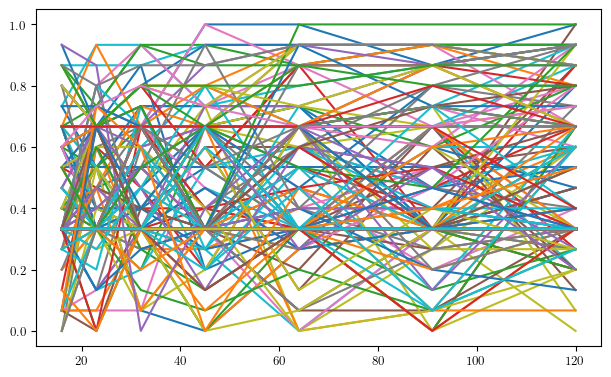

In [21]:
plt.figure(figsize=figsize)
for x, y in zip(anchor_values, accuracy_values):
    
    if len(x) != len(y): continue

    plt.plot(x, y)

plt.show()

In [5]:
import jmespath

# tutorial: https://jmespath.org/tutorial.html

data = r_df.loc[3, "m:json"]

# Tag of root node
expression = jmespath.compile("tag")
out = expression.search(data)
print(out)

# Get tags of all children nodes of root
expression = jmespath.compile("children[].tag")
out = expression.search(data)
print(out)


# Get all anchors
expression = jmespath.compile(
    f"children[?tag == 'build_curves'] | [0]"
    f".children[?tag == 'anchor'] | []"
    f".metadata.value"
)
out = expression.search(data)
print(out)


# expression = parse(
#     f"$"
#     f".children[?tag == 'build_curves']"
#     f".children[?tag == 'anchor']"
#     f".children[?tag == 'metrics']"
#     f".children[?tag == 'train']"
#     f".children[?tag == 'accuracy']"
#     f".metadata.value"
# )

# Get all anchors
expression = jmespath.compile(
    f"children[? tag == 'build_curves'] | [0]" # here we replace sublists by the first element
    f".children[? tag == 'anchor'] | []" # here we keep all elements of the list
    f".children[? tag == 'metrics'] | []"
    f".children[? tag == 'val'] | []"
    f".children[? tag == 'confusion_matrix'] | []"
    f".metadata.value"
)
out = expression.search(data)
print(out)

run
['load_task', 'build_curves']
[16, 23, 32, 45, 64, 91, 120]
[[[0, 1, 4], [4, 0, 1], [3, 2, 0]], [[2, 0, 3], [0, 2, 3], [0, 0, 5]], [[5, 0, 0], [2, 3, 0], [0, 3, 2]], [[5, 0, 0], [5, 0, 0], [3, 2, 0]], [[5, 0, 0], [3, 1, 1], [0, 2, 3]], [[5, 0, 0], [2, 2, 1], [5, 0, 0]], [[5, 0, 0], [2, 1, 2], [4, 1, 0]]]


In [6]:
from lcdb.analysis.score import accuracy_from_confusion_matrix
from lcdb.analysis.json import metric_from_json

ImportError: cannot import name 'metric_from_json' from 'lcdb.analysis.json' (/Users/romainegele/Documents/Research/LCDB/lcdb/publications/2023-neurips/lcdb/analysis/json.py)

In [7]:
from lcdb.analysis.json import QueryAnchorValues, QueryMetricValues

query = QueryAnchorValues()
print(query.apply(data))

query = QueryMetricValues("confusion_matrix")
print(query.apply(data))

[16, 23, 32, 45, 64, 91, 120]
[[[0, 1, 4], [4, 0, 1], [3, 2, 0]], [[2, 0, 3], [0, 2, 3], [0, 0, 5]], [[5, 0, 0], [2, 3, 0], [0, 3, 2]], [[5, 0, 0], [5, 0, 0], [3, 2, 0]], [[5, 0, 0], [3, 1, 1], [0, 2, 3]], [[5, 0, 0], [2, 2, 1], [5, 0, 0]], [[5, 0, 0], [2, 1, 2], [4, 1, 0]]]


In [6]:
from jsonpath_ng.ext import parse

# tutorial: https://github.com/h2non/jsonpath-ng

data = r_df.loc[2, "m:timer"]


# Tag of root node
expression = parse("$.tag")
out = expression.find(data)
out = [match.value for match in out][0]
print(out)

# Get tags of all children nodes of root
expression = parse("$.children[*].tag")
out = expression.find(data)
out = [match.value for match in out]
print(out)

# Get all anchors
expression = parse(
    "$.children[?tag == 'build_curves'].children[?tag == 'anchor'].metadata.value"
)
out = expression.find(data)
out = [match.value for match in out]
print(out)

# Get accuracy on train
expression = parse(
    f"$"
    f".children[?tag == 'build_curves']"
    f".children[?tag == 'anchor']"
    f".children[?tag == 'metrics']"
    f".children[?tag == 'train']"
    f".children[?tag == 'accuracy']"
    f".metadata.value"
)
out = expression.find(data)
out = [match.value for match in out]
print(out)

run
['load_task', 'build_curves']
[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 512, 724, 1024, 1448, 2048, 2556]
[1.0, 1.0, 1.0, 0.97778, 0.98438, 1.0, 1.0, 1.0, 0.92188, 0.87293, 0.84375, 0.80801, 0.84375, 0.84876, 0.81006, 0.8439]


In [55]:
# Python version on how to filter data
data = r_df.loc[2, "m:timer"]


data = [d for d in data["children"] if d["tag"] == "build_curves"][0]
anchors = [d["metadata"]["value"] for d in data["children"] if d["tag"] == "anchor"]
data = [d for d in data["children"] if d["tag"] == "anchor"]
data = [[d for d in d_["children"] if d["tag"] == "metrics"][0] for d_ in data]
data = [[d for d in d_["children"] if d["tag"] == "train"][0] for d_ in data]
accuracies = [[d["metadata"]["value"] for d in d_["children"] if d["tag"] == "accuracy"][0] for d_ in data]

print(anchors)
print(accuracies)

[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 512, 724, 1024, 1448, 2048, 2556]
[1.0, 1.0, 1.0, 0.97778, 0.98438, 1.0, 1.0, 1.0, 0.92188, 0.87293, 0.84375, 0.80801, 0.84375, 0.84876, 0.81006, 0.8439]


In [205]:
# Transform Dataframe of Successful results to dict
data = r_df.to_dict(orient="records")

# Extract anchors from all evaluations
expression = jmespath.compile(
    f'[*]."m:timer".children | [*]'
    f"[?tag=='build_curves'].children | [*][0]"
    f"[?tag=='anchor'].metadata.value"
)
out = expression.search(data)
pprint(out)

[[16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 512, 724, 1024, 1448, 2048, 2556],
 [16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 512, 724, 1024, 1448, 2048, 2556],
 [16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 512, 724, 1024, 1448, 2048, 2556],
 [16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 512, 724, 1024, 1448, 2048, 2556],
 [16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 512, 724, 1024, 1448, 2048, 2556],
 [16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 512, 724, 1024, 1448, 2048, 2556],
 [16, 23, 32, 45, 64, 91, 128, 181, 256, 362],
 [16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 512, 724, 1024, 1448, 2048, 2556],
 [16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 512, 724, 1024, 1448, 2048, 2556],
 [16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 512, 724, 1024, 1448, 2048, 2556],
 [16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 512, 724, 1024, 1448, 2048, 2556],
 [16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 512, 724, 1024, 1448, 2048, 2556],
 [16, 23, 32, 45, 64, 91, 128, 181, 256, 362, 512, 724, 1024, 

In [203]:
expression = jmespath.compile(
    f'[*]."m:timer".children | [*]'
    f"[?tag=='build_curves'].children | [*][0]"
    f"[?tag=='anchor'].children | [*][*]"
    f"[?tag=='metrics'].children | [*][*][0]"
    f"[?tag=='val'].children | [*][*][0]"
    f"[?tag=='accuracy'].metadata.value | [*][*][0]"
)
out = expression.search(data)
print(len(out))
pprint(out)

50
[[0.54688,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562],
 [0.54688,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562,
  0.66562],
 [0.5625,
  0.55625,
  0.54062,
  0.575,
  0.61562,
  0.6375,
  0.65625,
  0.6375,
  0.72188,
  0.725,
  0.75,
  0.7375,
  0.79375,
  0.80938,
  0.7875,
  0.8],
 [0.52812,
  0.53125,
  0.54688,
  0.61562,
  0.67812,
  0.74688,
  0.7125,
  0.7875,
  0.9,
  0.92812,
  0.91875,
  0.82812,
  0.92812,
  0.8875,
  0.925,
  0.92812],
 [0.56563,
  0.5,
  0.47812,
  0.54062,
  0.45625,
  0.47812,
  0.50938,
  0.46875,
  0.55,
  0.51875,
  0.47812,
  0.49688,
  0.54062,
  0.48438,
  0.49375,
  0.50625],
 [],
 [0.51562,
  0.45625,
  0.59688,
  0.7,
  0.69375,
  0.86875,
  0.90312,
  0.92812,
  0.94062,
  0.95625,
  0.9375,
  0.94375,
  0.95,
  0.

In [79]:
data[0]["m:timer"]

{'id': 0,
 'tag': 'run',
 'timestamp_start': 1699461098.938888,
 'timestamp_stop': 1699461100.662981,
 'duration': 1.724093,
 'status': 'STOPPED',
 'metadata': {},
 'children': [{'id': 1,
   'tag': 'load_task',
   'timestamp_start': 1699461098.938933,
   'timestamp_stop': 1699461099.130813,
   'duration': 0.19188,
   'status': 'STOPPED',
   'metadata': {},
   'children': []},
  {'id': 2,
   'tag': 'build_curves',
   'timestamp_start': 1699461099.262249,
   'timestamp_stop': 1699461100.662965,
   'duration': 1.400716,
   'status': 'STOPPED',
   'metadata': {},
   'children': [{'id': 3,
     'tag': 'anchor',
     'timestamp_start': 1699461099.262303,
     'timestamp_stop': 1699461099.356098,
     'duration': 0.093795,
     'status': 'STOPPED',
     'metadata': {'value': 16},
     'children': [{'id': 4,
       'tag': 'create_workflow',
       'timestamp_start': 1699461099.262338,
       'timestamp_stop': 1699461099.262402,
       'duration': 6.4e-05,
       'status': 'STOPPED',
       'me

In [72]:
print(out)

m:timer


In [50]:
# Get accuracy on train
expression = parse(
    f"$[*]['m:timer']"
    f".children[?tag == 'build_curves'].children"
    f".@.tag"
    # f".children[?tag == 'metrics']"
    # f".children[?tag == 'val']"
    # f".children[?tag == 'accuracy']"
    # f".metadata.value"
)
out = expression.find(data)
out = [match.value for match in out]
print(len(out))
print(out[0])

0


IndexError: list index out of range

In [31]:
sorted(r_df["objective"])

[0.47812,
 0.47812,
 0.53125,
 0.5375,
 0.66562,
 0.66562,
 0.66562,
 0.66562,
 0.66562,
 0.66562,
 0.66562,
 0.66562,
 0.66562,
 0.6875,
 0.73125,
 0.9375,
 0.9625]

In [32]:
# Check the columns
r_df.columns.to_list()

['p:C',
 'p:class_weight',
 'p:dual',
 'p:fit_intercept',
 'p:intercept_scaling',
 'p:loss',
 'p:max_iter',
 'p:multiclass',
 'p:penalty',
 'p:pp@cat_encoder',
 'p:pp@decomposition',
 'p:pp@featuregen',
 'p:pp@featureselector',
 'p:pp@scaler',
 'p:tol',
 'p:pp@kernel_pca_kernel',
 'p:pp@kernel_pca_n_components',
 'p:pp@poly_degree',
 'p:pp@selectp_percentile',
 'p:pp@std_with_std',
 'objective',
 'job_id',
 'm:timestamp_submit',
 'm:timestamp_gather',
 'm:timestamp_start',
 'm:timestamp_end',
 'm:memory',
 'm:fidelity_unit',
 'm:fidelity_values',
 'm:score_types',
 'm:score_values',
 'm:time_types',
 'm:time_values',
 'm:child_fidelities',
 'm:dataset_id',
 'm:workflow',
 'm:valid_prop',
 'm:test_prop',
 'm:monotonic',
 'm:valid_seed',
 'm:test_seed',
 'm:workflow_seed',
 'm:traceback']

In [21]:
# Cumulated time
duration_wo_overheads = (r_df["m:timestamp_end"] - r_df["m:timestamp_start"]).sum()
print(f"Cumulated time (without submit/gather overheads): {duration_wo_overheads:.2f} s.")

duration_w_overheads = (r_df["m:timestamp_gather"] - r_df["m:timestamp_submit"]).sum()
print(f"Cumulated time (with submit/gather overheads)   : {duration_w_overheads:.2f} s.")

ratio_overheads = (duration_w_overheads - duration_wo_overheads) / duration_wo_overheads
print(f"Overheads accounted for {ratio_overheads*100:.2f} % of the total time.\n")

# Real time
duration_run = (r_df["m:timestamp_gather"].max() - r_df["m:timestamp_submit"].min())
print(f"Real time of execution: {duration_run:.2f} s.")

Cumulated time (without submit/gather overheads): 277.21 s.
Cumulated time (with submit/gather overheads)   : 277.42 s.
Overheads accounted for 0.07 % of the total time.

Real time of execution: 98.17 s.


In [22]:
duration_job_mean = (r_df["m:timestamp_end"] - r_df["m:timestamp_start"]).mean()
duration_job_std  = (r_df["m:timestamp_end"] - r_df["m:timestamp_start"]).std()

print(f"Mean time per job: {duration_job_mean:.2f} s.")
print(f"Std  time per job: {duration_job_std:.2f} s.")

Mean time per job: 16.31 s.
Std  time per job: 17.78 s.


In [23]:
keys = ["m:fidelity_unit", "m:fidelity_values", "m:score_types"] 

for k in keys:
    print(f"{k[2:]}: {r_df[k][0]}")

fidelity_unit: samples
fidelity_values: [  16   23   32   45   64   91  128  181  256  362  512  724 1024 1448
 2048 2556]
score_types: ['accuracy' 'loss']


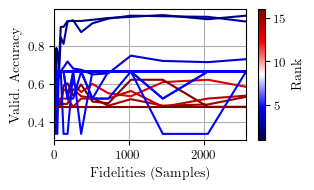

In [24]:
# Meaning of indexes
# fidelities, (train|valid|test), (accuracy|loss)

# Configuration of the plot
selected_split = "valid"
selected_score = "accuracy"

# Plotting
score_types = r_df["m:score_types"][0].tolist()
splits = ["train", "valid", "test"]
unit = r_df['m:fidelity_unit'][0]

idx_split = splits.index(selected_split)
idx_score = score_types.index(selected_score)

cmap = mpl.colormaps["seismic"]

fig = plt.figure()

# corresponds to iloc indexing
scores_max_fidelity = r_df["m:score_values"].map(lambda x: x[-1, idx_split, idx_score]).to_numpy()
ranking = rank(-scores_max_fidelity, decimals=3)
ranking_max = ranking.max()
for i in range(len(r_df)):
    fidelities = r_df.iloc[i]["m:fidelity_values"]
    scores = r_df.iloc[i]["m:score_values"][:, idx_split, idx_score]
    plt.plot(fidelities, scores, color=cmap(ranking[i]/ranking_max))

plt.xlabel(f"Fidelities ({unit.capitalize()})")
plt.ylabel(f"{selected_split.capitalize()}. {selected_score.capitalize()}")

plt.grid()

norm = mpl.cm.ScalarMappable(norm=None, cmap=cmap)
norm.set_clim(1, ranking_max)
cb = plt.colorbar(norm, ax=plt.gca(), label="Rank")
plt.xlim(0, fidelities.max())

plt.tight_layout()
plt.savefig(f"{unit}_{selected_split}-{selected_score}.png")
plt.show()